In [ ]:
# Importación necesaria
from unicodedata import category # PARA CONECTAR CON MONGO
from pymongo import MongoClient # PARA TOMAR EL TIEMPO DE EJECUCIÓN
from IPython.display import Image # pARA PODER CARGAR IMAGENES

In [ ]:
# Establecer el string de conección path + port
dbUrl = MongoClient('mongodb://localhost', 27017) # PUNTO DE CONEXIÓN

# Generar la base de datos
db = dbUrl['jardineria'] 

# Cantidad de datos a insertar
cantidad = 750001

In [ ]:
# INSERCIÓN DE LOS DATOS PARA OFICINA

# Crear una colección
coleccion = db['oficina'] 

# Establecer el punto de conteo 
start = time.perf_counter()

for num in range(1, cantidad):
    coleccion.insert_one({"codigo_oficina": "cd" + str(num),"ciudad": "ciudad", "pais": "pais", "region": "region", "codigo_postal": "234-533", "telefono": "telefono", "linea_direccion1": "linea_direccion1", "linea_direccion2": "linea_direccion2"})

# Terminar el componente de conteo
end = time.perf_counter()

# Mostrar el resultado de tiempo transcurrido
print(f"Tiempo transcurrido {end - start}") # 304.548586 msc

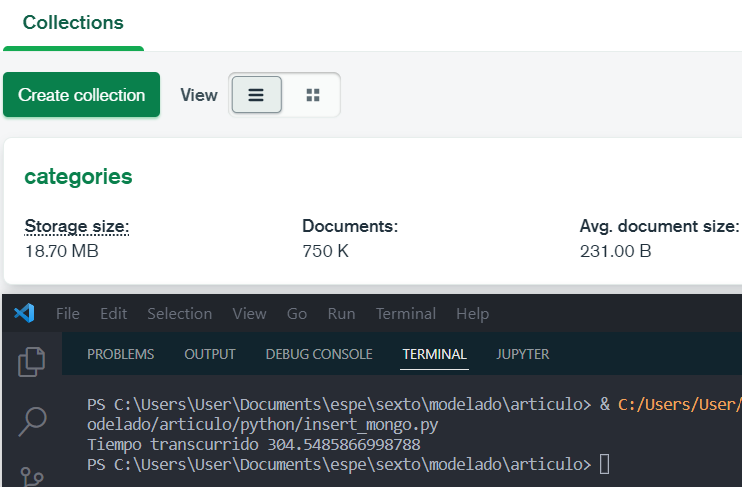

In [5]:
Image(filename='img/result_oficina.png')

In [ ]:
# INSERCIÓN DE LOS DATOS PARA EMPLEADO

# Crear una colección
coleccion = db['empleado'] 

# Establecer el punto de conteo 
start = time.perf_counter()

for num in range(1, cantidad):
    coleccion.insert_one({"nombre": "Empleado" + str(num), "apellido1": "Apellido1", "apellido2": "Apellido2", "extension": "Extensión", "email": "emai@gmail.com", "codigo_oficina": {"$href": "oficina", "$codigo_oficina": "cd" + str(num)}, "puesto": "puesto"})

# Terminar el componente de conteo
end = time.perf_counter()

# Mostrar el resultado de tiempo transcurrido
print(f"Tiempo transcurrido {end - start}") # 297.75404219 msc

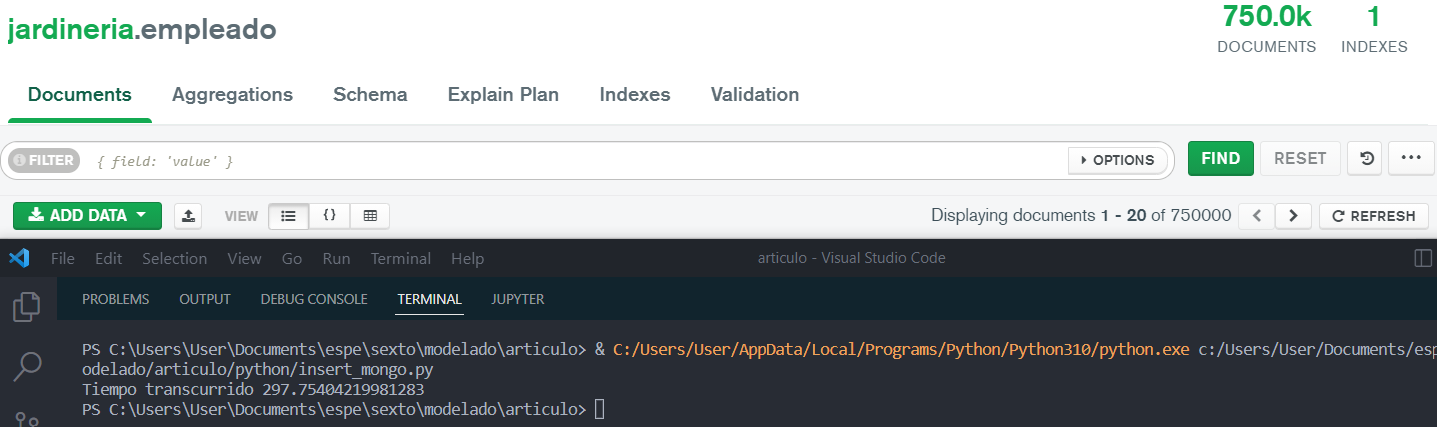

In [6]:
Image(filename='img/result_empleado.png')

In [ ]:
# INSERCIÓN DE LOS DATOS PARA GAMA PRODUCTO

# Crear una colección
coleccion = db['gama_producto'] 

# Establecer el punto de conteo 
start = time.perf_counter()

for num in range(1, cantidad):
    coleccion.insert_one({"gama": "Gama" + str(num), "descripcion_texto": "", "descripcion_html": "", "imagen": ""})

# Terminar el componente de conteo
end = time.perf_counter()

# Mostrar el resultado de tiempo transcurrido
print(f"Tiempo transcurrido {end - start}") # 345.6658881 msc

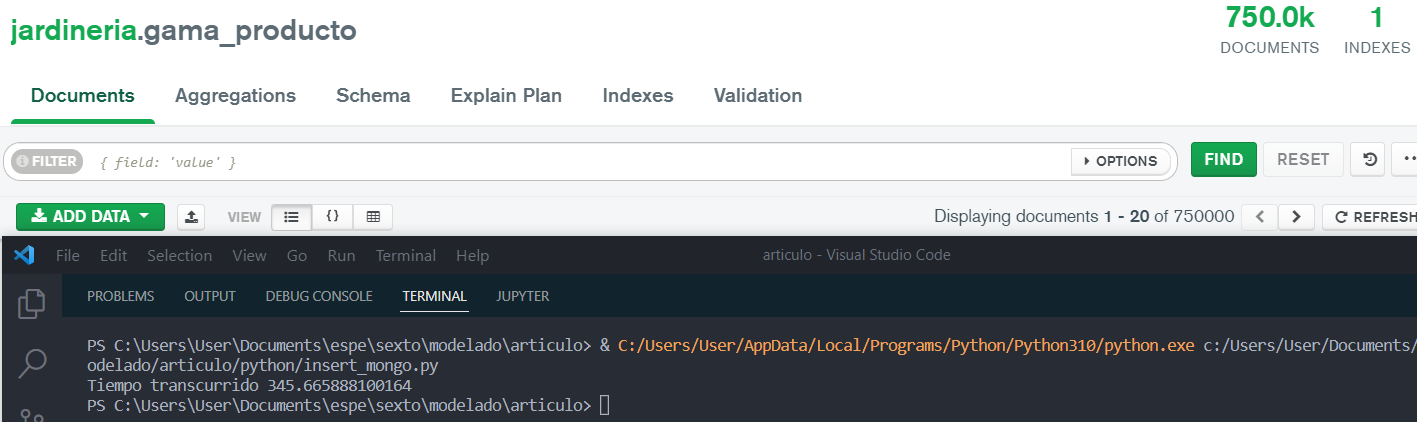

In [7]:
Image(filename='img/result_gama_producto.png')

In [ ]:
# INSERCIÓN DE LOS DATOS PARA CLIENTE

# Llamar a la colección empleado
coleccionEmpleado = db['empleado']

# Arregloq ue almacenara los _id de los empleados
array_id = []

# Cantidades de regsitros
cantidad = 750001

# Ciclo para ir agregando los _id UNO POR UNO
for item in coleccionEmpleado.find():
    array_id.append(item["_id"])
    
# Crear la conexión cliente
coleccion = db['cliente']

start = time.perf_counter()

for num in range(1, cantidad):    
    coleccion.insert_one({"nombre_cliente": "cliente" + str(num) , "nombre_contacto": "NombreContacto", "apellido_contacto": "ApellidoContacto" ,"telefono": "telefono", "fax": "fax", "linea_direccion1": "linea_direccion1", "linea_direccion2": "linea_direccion2", "ciudad": "ciudad", "region": "region", "pais": "pais", "codigo_postal": "234-53", "codigo_empleado_rep_ventas": {"$ref": "empleado", "$_id": ObjectId(array_id[num])}, "limite_credito": 2000})
    
end = time.perf_counter()

print(f"Tiempo transcurrido {end - start}") # 604.98098 msc